In [6]:
# Import necessary libraries
import pandas as pd  # For handling dataframes
import matplotlib.pyplot as plt  # For plotting graphs
from selenium import webdriver  # For web scraping using a web driver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager  # For automatic web driver installation
from selenium.common.exceptions import TimeoutException, NoSuchElementException
from nltk.sentiment import SentimentIntensityAnalyzer  # For sentiment analysis
import nltk  # Natural Language Toolkit for text analysis

# Download VADER lexicon(required for sentiment analysis)
nltk.download('vader_lexicon', quiet=True)

True

# Web Scraping Function

In [8]:
def get_yahoo_finance_news(ticker):
    """
    Scrape news headlines for the given stock ticker from Yahoo Finance.
    Returns a list of headlines.
    """
    # Define URL for the Yahoo Finance page of the given ticker
    url = f"https://finance.yahoo.com/quote/{ticker}"
    
    # Set up Chrome options for a headless browser (no GUI)
    chrome_options = Options()
    chrome_options.add_argument("--headless")
    chrome_options.add_argument("--no-sandbox")
    chrome_options.add_argument("--disable-dev-shm-usage")
    
    # Initialize the Chrome web driver
    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service, options=chrome_options)
    
    try:
        # Open the Yahoo Finance page for the ticker
        driver.get(url)
        print(f"Page title: {driver.title}")  # Debugging information
        
        # Wait until the page body is loaded
        WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.TAG_NAME, "body")))
        
        # Find news items by checking for links related to news or video
        news_items = driver.find_elements(By.XPATH, "//a[contains(@href, '/news/') or contains(@href, '/video/')]")
        
        news_headlines = []
        # Extract headline text and links, ensuring they are valid and not too short
        for item in news_items:
            try:
                headline_text = item.text.strip()
                href = item.get_attribute("href")
                if headline_text and href and len(headline_text) > 10:
                    news_headlines.append(headline_text)
            except Exception as e:
                print(f"Error processing an item: {e}")
        
        return news_headlines
    
    finally:
        # Close the browser after scraping
        driver.quit()


# Sentiment Analysis Functions

In [10]:
def analyze_sentiment(news):
    """
    Analyze the sentiment of a list of news headlines using VADER.
    Returns a list of sentiment scores.
    """
    analyzer = SentimentIntensityAnalyzer()
    sentiment_scores = []
    
    # Analyze sentiment for each headline
    for headline in news:
        sentiment = analyzer.polarity_scores(headline)
        sentiment_scores.append(sentiment['compound'])
    
    return sentiment_scores

def label_sentiment(score):
    """
    Label the sentiment score based on its value.
    Returns 'Positive', 'Negative', or 'Neutral'.
    """
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'


# Plotting Functions

In [11]:
def plot_sentiment_distribution(news_df, ticker):
    """
    Plot a histogram showing the distribution of sentiment scores for the news headlines.
    """
    plt.figure(figsize=(10, 6))
    plt.hist(news_df['Sentiment_Score'], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Sentiment Distribution for {ticker} News Headlines')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Number of Headlines')
    plt.show()

def plot_sentiment_breakdown(news_df, ticker):
    """
    Plot a bar chart showing the breakdown of sentiments (Positive, Negative, Neutral) for the headlines.
    """
    sentiment_counts = news_df['Sentiment_Label'].value_counts()
    plt.figure(figsize=(8, 5))
    colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'gray'}
    sentiment_counts.plot(kind='bar', color=[colors[label] for label in sentiment_counts.index], edgecolor='black')
    plt.title(f'Sentiment Breakdown for {ticker} News Headlines')
    plt.xlabel('Sentiment')
    plt.ylabel('Number of Headlines')
    plt.show()

# Main Execution Block

Page title: Microsoft Corporation (MSFT) Stock Price, News, Quote & History - Yahoo Finance
Latest news headlines for MSFT:
1. Microsoft's VP of GenAI research to join OpenAI
2. Nvidia Stock Hits Record Closing High on Growing Optimism About AI Demand
3. Microsoft Artificial Intelligence VP Bubeck to Join OpenAI
4. Microsoft Corporation (MSFT): Most Promising Growth Stock According to Hedge Funds
5. How to separate earnings winners from losers: Asset manager
6. Nvidia notches record close, could unseat Apple as most valuable company
7. Microsoft (MSFT): A Key Player Among the Most Profitable Tech Stocks Right Now
8. Microsoft's Nadella Makes A Point Of Calling Fellow CEOs Each Day
9. Microsoft Corporation (MSFT) is Attracting Investor Attention: Here is What You Should Know
10. Why Microsoft Corporation (MSFT) Is a Must-Have Stock for the Next Decade
11. How to separate earnings winners from losers: Asset manager
Mahoney Asset Management CEO Ken Mahoney joins Wealth! Host Brad Smith to

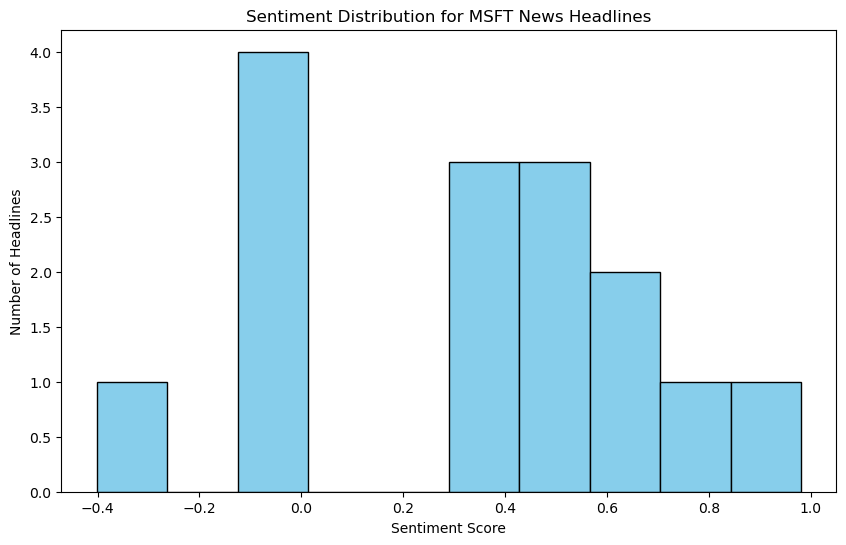

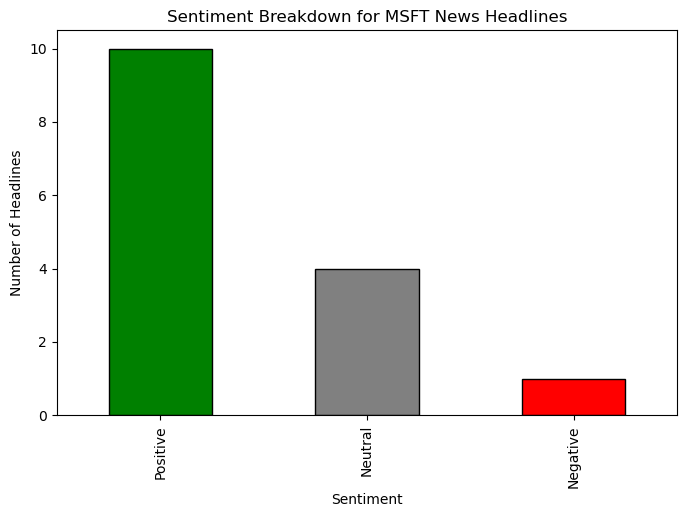

In [8]:
# Define the stock ticker you want to analyze
ticker = "MSFT"

# Scrape news headlines for the ticker
news = get_yahoo_finance_news(ticker)

if news:
    print(f"Latest news headlines for {ticker}:")
    # Display the headlines
    for index, headline in enumerate(news, start=1):
        print(f"{index}. {headline}")
    
    # Perform sentiment analysis on the headlines
    sentiment_scores = analyze_sentiment(news)
    
    # Create a DataFrame to store headlines and their sentiment scores
    news_df = pd.DataFrame({
        'News_Headline': news,
        'Sentiment_Score': sentiment_scores
    })
    
    # Apply sentiment labels to the DataFrame
    news_df['Sentiment_Label'] = news_df['Sentiment_Score'].apply(label_sentiment)
    
    # Display the DataFrame with sentiment scores and labels
    print("\nNews headlines with sentiment scores and labels:")
    print(news_df.to_string(index=False))
    
    # Calculate and display the average sentiment score
    average_sentiment = news_df['Sentiment_Score'].mean()
    print(f"\nAverage sentiment score: {average_sentiment:.4f}")
    
    # Interpret overall sentiment based on the average score
    if average_sentiment > 0.05:
        print("Overall sentiment is positive.")
    elif average_sentiment < -0.05:
        print("Overall sentiment is negative.")
    else:
        print("Overall sentiment is neutral.")
    
    # Plot sentiment distribution and breakdown
    plot_sentiment_distribution(news_df, ticker)
    plot_sentiment_breakdown(news_df, ticker)

else:
    print(f"No news headlines found for {ticker}.")


In [5]:
#pip install yfinance

In [6]:
#pip install yahoofinancials

# Correlate Sentiment with Stock Price

[*********************100%***********************]  1 of 1 completed

Stock Price Data:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-09-16  430.600006  433.529999  428.220001  431.339996  431.339996   
2024-09-17  440.230011  441.850006  432.269989  435.149994  435.149994   
2024-09-18  435.000000  436.029999  430.410004  430.809998  430.809998   
2024-09-19  441.230011  441.500000  436.899994  438.690002  438.690002   
2024-09-20  437.220001  439.239990  434.220001  435.269989  435.269989   

              Volume  
Date                  
2024-09-16  13834700  
2024-09-17  18874200  
2024-09-18  18898000  
2024-09-19  21706600  
2024-09-20  55167100  


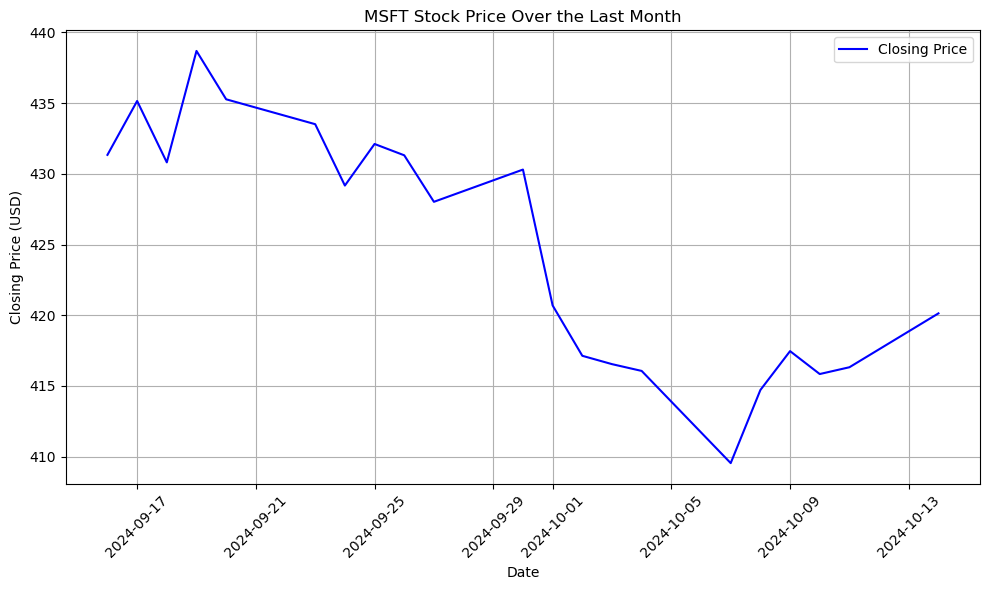

In [4]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials

# Fetch historical stock price data for the specified ticker
stock_data = yf.download(ticker, period='1mo', interval='1d')

# Display the first few rows of the stock price data
print("Stock Price Data:")
print(stock_data.head())

# Plot the closing price over time
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'], label='Closing Price', color='blue')
plt.title(f'{ticker} Stock Price Over the Last Month')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.legend()
plt.grid()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()